Visualization is the best way to explore and communicate insights about data. But many times, we find it is difficult to visualize if we have a lot of data points, the traditional visualization techniques break down. [datashader](https://github.com/bokeh/datashader) is a tool developed by [Continuum Analytics](https://www.continuum.io/) come to rescue. It is extremly easy and fast to use it to plot even billions of data points (see the [examples](https://github.com/bokeh/datashader/tree/master/examples) or a [video from Scipy 2016](https://www.youtube.com/watch?v=6m3CFbKmK_c)). 

This week, we will use datashader to plot the global seismicity for earthquakes larger than M2.0. To speed up the process, I downloaded the earthquake locations/times from the [ANSS Catalog](http://www.quake.geo.berkeley.edu/anss/catalog-search.html) from 1898 to 2016, and save them as a csv file in the data folder (You can also grab the data directly using the APIs from my [previous blog post](http://qingkaikong.blogspot.com/2016/02/query-usgs-catalog-online-and-plot.html)). All together, we only have 1120244 earthquakes

And with a couple of lines, you can see we get a very nice looking map with the global seismicity. 

In [1]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno

In [2]:
# read in the earthquake data from file, note that I only read
# in 5 columns with Origin time, Latitude, Longitude, Depth, and
# Magnitude of the earthquakes
df_eq = pd.read_csv('./data/catalog.csv', usecols=[0,1,2,3,4])

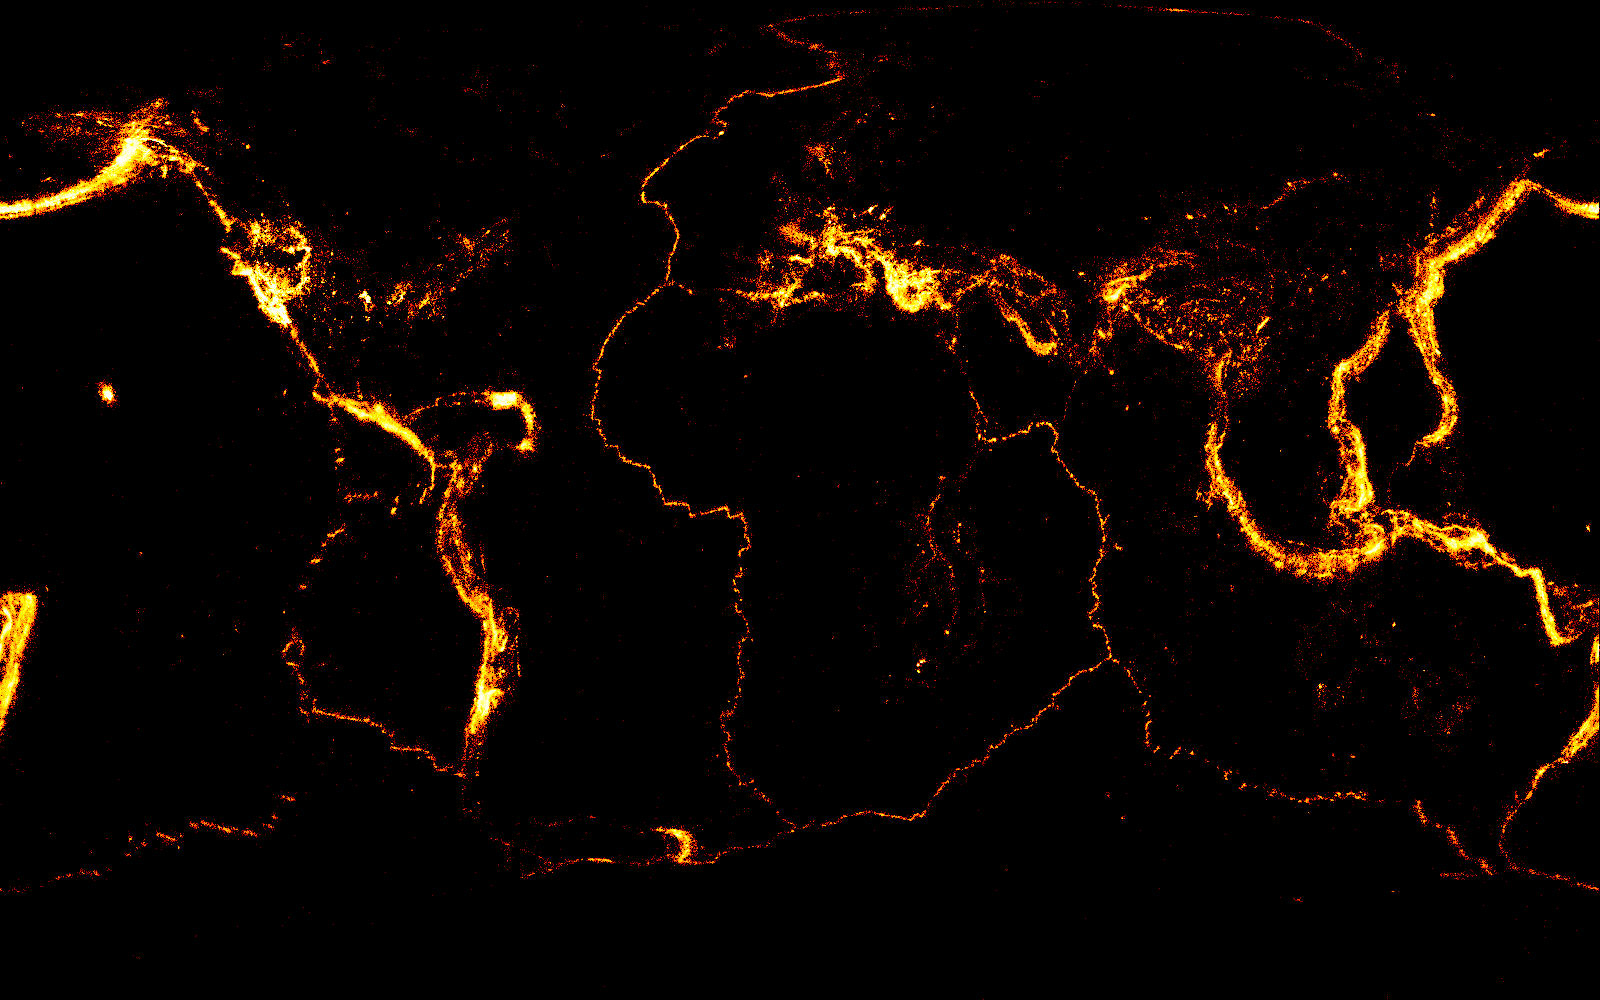

In [3]:
# now let's plot them using a black background
background = "black"
export = partial(export_image, background = background)
cm = partial(colormap_select, reverse=(background!="black"))

cvs = ds.Canvas(plot_width=1600, plot_height=1000)
agg = cvs.points(df_eq, 'Longitude', 'Latitude')
export(tf.interpolate(agg, cmap = cm(Hot,0.2), how='eq_hist'),"global_seismicity")